<a href="https://colab.research.google.com/github/abdulwasaeee/NUS-assignments/blob/main/A0328301R_AhmedAbdulWasaeAnnan_MR3WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categories of **Knowledge Graph Embedding Models** in **PyKEEN**

PyKEEN provides a wide range of knowledge graph embedding models that fall into different categories based on their underlying techniques. These models learn low-dimensional vector representations of entities and relations in a knowledge graph, enabling tasks like link prediction, entity classification, and clustering.

# 1. **Translational Distance Models**
Use translation-based scoring functions to model relationships between entities as vector translations.

Key Models:
*  **TransE:** Models relationships as translations in the embedding space.
*   **TransH:** Extends TransE by projecting entities onto hyperplanes for asymmetric relations.
*   **TransR/TransD:** Projects entities into relation-specific spaces for complex relationships.

# 2. Semantic Matching Models
Use similarity-based scoring functions to measure the compatibility of triples.
Key Models:

*   **DistMult:** Uses a bilinear scoring function; effective but symmetric by design.
*   **ComplEx:** Extends DistMult to complex-valued embeddings for asymmetric relations.
*   **RESCAL:** Captures pairwise interactions between entities and relations via tensor factorization.


# 3. Neural Network-Based Models
Use deep neural networks to capture complex patterns in the knowledge graph.
Key Models:
*   **ConvE:** Uses 2D convolutional neural networks for feature extraction.
*   **ConvKB:** Models triples as feature maps processed by convolutional layers.
*   **RGCN (Relational Graph Convolutional Network):** Extends graph neural networks to capture multi-relational data.


# 4. Geometric Models
Represent entities and relations in non-Euclidean spaces like hyperbolic or spherical spaces.
Key Models:
*   RotatE: Models relations as rotations in a complex vector space.
*   Hyperbolic Embeddings: Embeds entities in hyperbolic space to capture hierarchical relationships.


# 5. Tensor Factorization Models
Factorize the knowledge graph into lower-dimensional tensors for embedding.
Key Models:
*   **Tucker:** A tensor factorization approach with a core tensor and factor matrices.
*   **SimplE:** A simplified version of canonical polyadic (CP) decomposition.


# 6. Recent and Hybrid Models
Combine multiple scoring functions or incorporate additional features for improved performance.
Key Models:
*   **HolE (Holographic Embeddings):** Combines circular correlation with tensor factorization.
*   **BoxE:** Models entities and relations as boxes to capture complex relationships.
*   **KG2E:** Uses Gaussian embeddings to account for uncertainty in knowledge graphs.


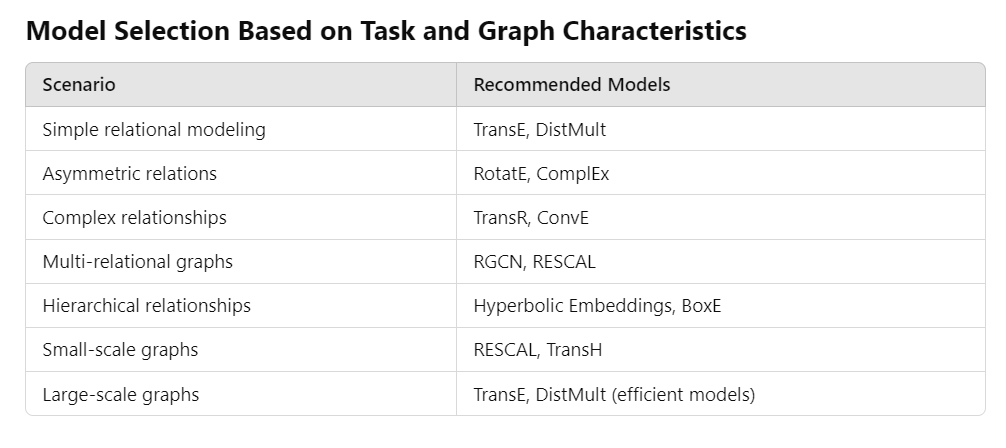


# 1. Install PyKEEN
First, install PyKEEN via pip if it’s not already installed:


# 2. Import Necessary Libraries


In [1]:
!pip install pykeen pandas matplotlib scikit-learn pykeen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.3/730.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00


In [2]:
# Import Necessary Libraries
import pykeen
from pykeen.pipeline import pipeline
from pykeen.datasets import UMLS, Nations, WN18RR
from pykeen.predict import predict_target
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

# Set timezone to specific region

tz = pytz.timezone("Asia/Singapore")

local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

INFO:pykeen.utils:Using opt_einsum


Job ending on Singapore time: 2025-08-24 18:58:15.908816+08:00


# 3. Load a Knowledge Graph Dataset
PyKEEN provides several built-in datasets for experimentation. Here, we use the Nations dataset.
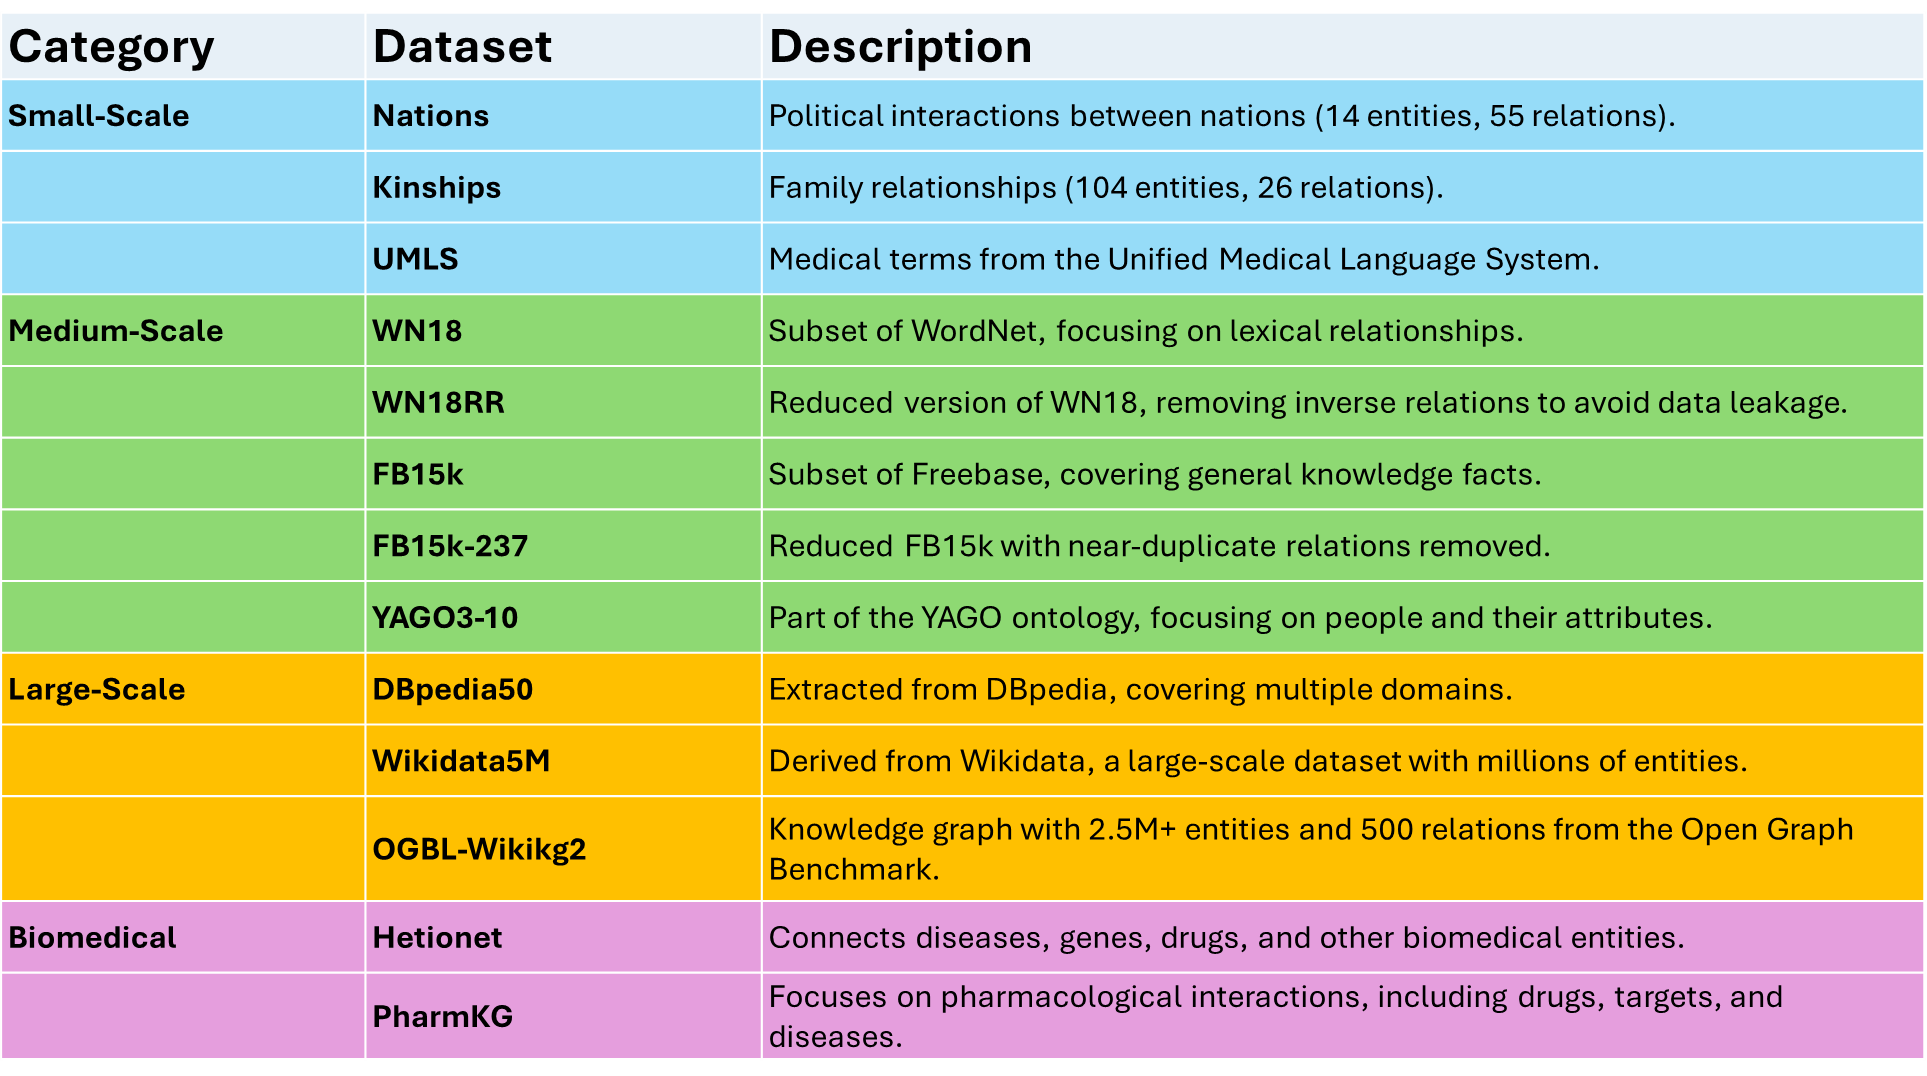

In [3]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)

# Step 3: Load a Knowledge Graph Dataset
dataset = UMLS()

# Explore the dataset
print(f"Number of entities: {len(dataset.entity_to_id)}")
print(f"Number of relations: {len(dataset.relation_to_id)}")
print(f"Sample triples:\n{dataset.training.mapped_triples[:5]}")

local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

Job starting on Singapore time: 2025-08-24 18:58:15.919272+08:00
Number of entities: 135
Number of relations: 46
Sample triples:
tensor([[ 0,  1,  3],
        [ 0,  1,  9],
        [ 0,  1, 11],
        [ 0,  1, 12],
        [ 0,  1, 18]])
Job ending on Singapore time: 2025-08-24 18:58:15.972081+08:00


# 4. Train a Knowledge Graph Embedding Model
PyKEEN supports multiple embedding models (e.g., TransE, DistMult, RotatE). Let’s train a TransE model on the Nations dataset.


In [4]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)

# Step 4: Train a Knowledge Graph Embedding Model
result = pipeline(
    dataset=dataset,
    model='TransE',  # Choose the embedding model
    training_loop='sLCWA',  # Stochastic Local Closed-World Assumption
    optimizer='adam',  # Optimizer
    loss='marginranking',  # Loss function
    model_kwargs=dict(embedding_dim=50),  # Set embedding dimension
    training_kwargs=dict(num_epochs=20, batch_size=50),  # Training parameters
    random_seed=42,  # For reproducibility
)

local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Job starting on Singapore time: 2025-08-24 18:58:15.979977+08:00


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training epochs on cpu:   0%|          | 0/20 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/105 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/661 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.33s seconds


Job ending on Singapore time: 2025-08-24 18:58:39.541048+08:00


# 5. Evaluate the Model
Evaluate the performance of the model using metrics like Mean Rank (MR) and Hits@k.


In [5]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)

metrics = result.metric_results.to_dict()
print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    if isinstance(value, (int, float)):  # Format numbers
        print(f"{metric}: {value:.4f}")
    else:  # Print non-numeric values as is
        print(f"{metric}: {value}")

local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

Job starting on Singapore time: 2025-08-24 18:58:39.552090+08:00

Evaluation Metrics:
head: {'optimistic': {'inverse_harmonic_mean_rank': 0.3935122969292397, 'median_rank': 3.0, 'geometric_mean_rank': 3.750314724086448, 'adjusted_inverse_harmonic_mean_rank': 0.34609449375231516, 'z_geometric_mean_rank': 25.37630333722419, 'harmonic_mean_rank': 2.541216647620588, 'z_inverse_harmonic_mean_rank': 69.51460753659387, 'inverse_arithmetic_mean_rank': 0.1345684039087948, 'median_absolute_deviation': 1.482602218505602, 'adjusted_geometric_mean_rank_index': 0.9265228212415748, 'z_arithmetic_mean_rank': 37.95266153480711, 'variance': 149.91243268233845, 'adjusted_arithmetic_mean_rank_index': 0.8845166460656606, 'standard_deviation': 12.243873271246255, 'adjusted_arithmetic_mean_rank': 0.13108629224877572, 'inverse_median_rank': 0.3333333333333333, 'count': 661.0, 'inverse_geometric_mean_rank': 0.2666442881653335, 'arithmetic_mean_rank': 7.431164901664145, 'hits_at_1': 0.13010590015128592, 'hits_a

# 6. Access the Embeddings
You can extract the learned embeddings for entities and relations.


In [6]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)

# Step 6: Access the Embeddings
entity_embeddings = result.model.entity_representations[0](indices=None).detach().numpy()
relation_embeddings = result.model.relation_representations[0](indices=None).detach().numpy()
print("\nSample Entity Embeddings:")
print(entity_embeddings[:5])
print("\nSample Relation Embeddings:")
print(relation_embeddings[:5])

local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

Job starting on Singapore time: 2025-08-24 18:58:39.565441+08:00

Sample Entity Embeddings:
[[ 0.13963906  0.18141115  0.01021739  0.12661746  0.16907193  0.04909296
   0.130834    0.18041894  0.03579249  0.18599798 -0.07258056 -0.17899998
   0.22451258 -0.2343184   0.08082882  0.21566932  0.25030828  0.00269561
   0.14696221  0.2176135   0.3192323  -0.00332716  0.13285819  0.22412388
   0.1835119  -0.097206   -0.01735923  0.02507031  0.1310844  -0.14746402
  -0.00124081 -0.1437847  -0.1487618  -0.11468968 -0.13640665 -0.12093142
  -0.05103493 -0.02249876 -0.117963   -0.14109945 -0.16433944  0.08525459
  -0.19623314  0.05728809  0.07775124  0.01664245  0.05766379 -0.03912349
   0.12156741  0.0818404 ]
 [-0.20290226 -0.17457448 -0.07966547  0.14658274 -0.01348513  0.01576867
  -0.13229819  0.10454234 -0.15423657  0.11018952  0.10291081 -0.07813838
  -0.14450257  0.04034203  0.15071301 -0.02430077 -0.04617373  0.12598437
   0.1292004  -0.0930146   0.18772297 -0.07693347 -0.05024183 -0.20

# 7. Perform Link Prediction (Hands-on)
Use the trained model to predict missing links in the knowledge graph.
Make sure the correct sequence of head/tail, head/relation pairs when doing the predictions (FOR YOU TO COMPLETE.........)

Student to complete the code for prediction

In [7]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)

# Step 7: Perform Link Prediction and print the results
#head_entity = "steroid"  # Replace with an actual entity from the dataset
#relation = "disrupts"  # Replace with an actual relation

# ===== 1. Find valid entities/relations =====
# Print the first 10 entities and relations to see their format
print("Sample entities:", list(result.training.entity_to_id.keys())[:10])
print("Sample relations:", list(result.training.relation_to_id.keys())[:10])

# ===== 2. Replace with VALID entries from the printed lists =====
head_entity = "amino_acid_peptide_or_protein"  # match EXACTLY from entity list
relation = "associated_with"   # match EXACTLY from relation list

# ===== 3. Get IDs =====
try:
    head_id = result.training.entity_to_id[head_entity]
    relation_id = result.training.relation_to_id[relation]
except KeyError as e:
    print(f"Error: {e} not found in mappings. Check the printed lists above.")
    raise

# ===== 4. Predict missing tails =====
predictions = predict_target(
    model=result.model,
    head=head_entity,
    relation=relation,
    triples_factory=result.training
)
# ===== 5. Display results =====
predictions_df = predictions.df
predictions_df["tail_label"] = predictions_df["tail_id"].map(
    result.training.entity_id_to_label
)

# Taking the top 5 predictions
predictions_df = predictions_df.head(5)

print("\nTop 5 Predicted Tails:")
print(predictions_df[["tail_label", "score"]].to_string(index=False))

local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

Job starting on Singapore time: 2025-08-24 18:58:39.583589+08:00
Sample entities: ['acquired_abnormality', 'activity', 'age_group', 'alga', 'amino_acid_peptide_or_protein', 'amino_acid_sequence', 'amphibian', 'anatomical_abnormality', 'anatomical_structure', 'animal']
Sample relations: ['adjacent_to', 'affects', 'analyzes', 'assesses_effect_of', 'associated_with', 'carries_out', 'causes', 'co-occurs_with', 'complicates', 'conceptual_part_of']

Top 5 Predicted Tails:
                           tail_label     score
        amino_acid_peptide_or_protein -7.241493
                                lipid -8.097923
nucleic_acid_nucleoside_or_nucleotide -8.295533
                               enzyme -8.519730
                   organism_attribute -8.946008
Job ending on Singapore time: 2025-08-24 18:58:39.624187+08:00


# 8. Print Entity list in the training datasets

In [8]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)

print(list(result.training.entity_to_id.keys()))


local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

Job starting on Singapore time: 2025-08-24 18:58:39.633836+08:00
['acquired_abnormality', 'activity', 'age_group', 'alga', 'amino_acid_peptide_or_protein', 'amino_acid_sequence', 'amphibian', 'anatomical_abnormality', 'anatomical_structure', 'animal', 'antibiotic', 'archaeon', 'bacterium', 'behavior', 'biologic_function', 'biologically_active_substance', 'biomedical_occupation_or_discipline', 'biomedical_or_dental_material', 'bird', 'body_location_or_region', 'body_part_organ_or_organ_component', 'body_space_or_junction', 'body_substance', 'body_system', 'carbohydrate', 'carbohydrate_sequence', 'cell', 'cell_component', 'cell_function', 'cell_or_molecular_dysfunction', 'chemical', 'chemical_viewed_functionally', 'chemical_viewed_structurally', 'classification', 'clinical_attribute', 'clinical_drug', 'conceptual_entity', 'congenital_abnormality', 'daily_or_recreational_activity', 'diagnostic_procedure', 'disease_or_syndrome', 'drug_delivery_device', 'educational_activity', 'eicosanoid',

# 9. Print Entity list in the relation datasets

In [9]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)

print(list(result.training.relation_to_id.keys()))

local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

Job starting on Singapore time: 2025-08-24 18:58:39.643913+08:00
['adjacent_to', 'affects', 'analyzes', 'assesses_effect_of', 'associated_with', 'carries_out', 'causes', 'co-occurs_with', 'complicates', 'conceptual_part_of', 'conceptually_related_to', 'connected_to', 'consists_of', 'contains', 'degree_of', 'derivative_of', 'developmental_form_of', 'diagnoses', 'disrupts', 'evaluation_of', 'exhibits', 'indicates', 'ingredient_of', 'interacts_with', 'interconnects', 'isa', 'issue_in', 'location_of', 'manages', 'manifestation_of', 'measurement_of', 'measures', 'method_of', 'occurs_in', 'part_of', 'performs', 'practices', 'precedes', 'prevents', 'process_of', 'produces', 'property_of', 'result_of', 'surrounds', 'treats', 'uses']
Job ending on Singapore time: 2025-08-24 18:58:39.644611+08:00


# 10. Visualize the Embeddings
For visualization, reduce the dimensionality of the embeddings using t-SNE or PCA.

Job starting on Singapore time: 2025-08-24 18:58:39.656430+08:00


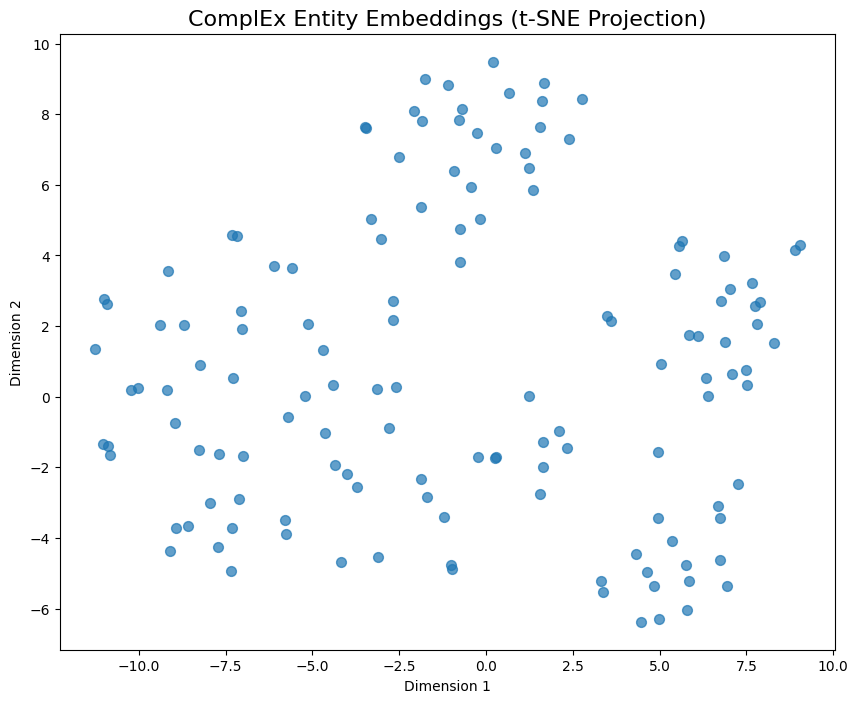

Job ending on Singapore time: 2025-08-24 18:58:40.825769+08:00


In [10]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)
import numpy as np
# Step 10: Visualize the Embeddings
# Apply t-SNE to the entity embeddings
entity_embeddings = result.model.entity_representations[0]().detach().cpu().numpy()

embeddings_real = np.concatenate(
    [entity_embeddings.real, entity_embeddings.imag], axis=1
)

n_samples = embeddings_real.shape[0]
perplexity = min(30, n_samples // 3)

tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings_real)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=50, alpha=0.7)
plt.title("ComplEx Entity Embeddings (t-SNE Projection)", fontsize=16)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

# 11. Save the Trained Model
Save the model for reuse:

In [11]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)

# Step 11: Save the Trained Model
result.save_to_directory("transE_nations_model")
print("\nModel saved to 'transE_nations_model' directory.")


local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=135, num_relations=46, create_inverse_triples=False, num_triples=5216, path="/usr/local/lib/python3.12/dist-packages/pykeen/datasets/umls/train.txt") to file:///content/transE_nations_model/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /content/transE_nations_model


Job starting on Singapore time: 2025-08-24 18:58:40.835797+08:00

Model saved to 'transE_nations_model' directory.
Job ending on Singapore time: 2025-08-24 18:58:40.881715+08:00




```
# This is formatted as code
```

# 11. Load the Trained Model
Load the saved model

In [12]:
local_time = datetime.now(tz)
print("Job starting on Singapore time:", local_time)

from pykeen.pipeline import pipeline

# Step 8: Load a Saved Model
#result_loaded = pipeline().from_directory

result_loaded = pipeline(
    dataset=dataset,
    model='TransE',  # Choose the embedding model
    training_loop='sLCWA',  # Stochastic Local Closed-World Assumption
    optimizer='adam',  # Optimizer
    loss='marginranking',  # Loss function
    model_kwargs=dict(embedding_dim=50),  # Set embedding dimension
    training_kwargs=dict(num_epochs=50, batch_size=128),  # Training parameters
    random_seed=42,  # For reproducibility
)
print(f"Using random seed: {result.random_seed}")  # Confirm the seed
# Access the model from the loaded result
trained_model = result_loaded.model
print("Loaded model:", trained_model)


local_time = datetime.now(tz)
print("Job ending on Singapore time:", local_time)

INFO:pykeen.pipeline.api:Using device: None
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()
INFO:pykeen.nn.representation:Inferred unique=False for Embedding()


Job starting on Singapore time: 2025-08-24 18:58:40.897999+08:00


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training epochs on cpu:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0.00/41.0 [00:00<?, ?batch/s]

Evaluating on cpu:   0%|          | 0.00/661 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.40s seconds


Using random seed: 42
Loaded model: TransE(
  (loss): MarginRankingLoss(
    (margin_activation): ReLU()
  )
  (interaction): TransEInteraction()
  (entity_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(135, 50)
    )
  )
  (relation_representations): ModuleList(
    (0): Embedding(
      (_embeddings): Embedding(46, 50)
    )
  )
  (weight_regularizers): ModuleList()
)
Job ending on Singapore time: 2025-08-24 18:59:01.383692+08:00
